In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()


print(len(train_data))
print(len(test_data))

404
102


In [5]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean=train_data.mean(axis=0)
train_data=train_data-mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std=train_data.std(axis=0)
train_data=train_data/std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data=test_data-mean
test_data=test_data/std

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(train_data)  
x_test = scaler.transform(test_data)

x_train, x_val, y_train, y_val = train_test_split(x_train, train_labels, test_size=0.2, random_state=42)

In [6]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(loss='mse',
              optimizer='SGD',
              metrics=['mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
1/1 [==============================] - 1s 1s/step - loss: 595.7948 - mae: 22.4512 - val_loss: 351.8782 - val_mae: 17.5874
Epoch 2/60
1/1 [==============================] - 0s 23ms/step - loss: 454.8990 - mae: 19.4555 - val_loss: 228.5902 - val_mae: 14.0157
Epoch 3/60
1/1 [==============================] - 0s 23ms/step - loss: 283.1089 - mae: 14.9828 - val_loss: 119.2259 - val_mae: 9.7485
Epoch 4/60
1/1 [==============================] - 0s 23ms/step - loss: 136.8754 - mae: 9.3009 - val_loss: 74.5560 - val_mae: 7.4433
Epoch 5/60
1/1 [==============================] - 0s 24ms/step - loss: 90.2953 - mae: 7.0494 - val_loss: 48.3046 - val_mae: 5.8761
Epoch 6/60
1/1 [==============================] - 0s 23ms/step - loss: 62.0109 - mae: 5.5880 - val_loss: 32.8789 - val_mae: 4.6807
Epoch 7/60
1/1 [==============================] - 0s 23ms/step - loss: 46.1389 - mae: 4.6923 - val_loss: 26.1249 - val_mae: 4.0075
Epoch 8/60
1/1 [==============================] - 0s 23ms/step - loss: 38

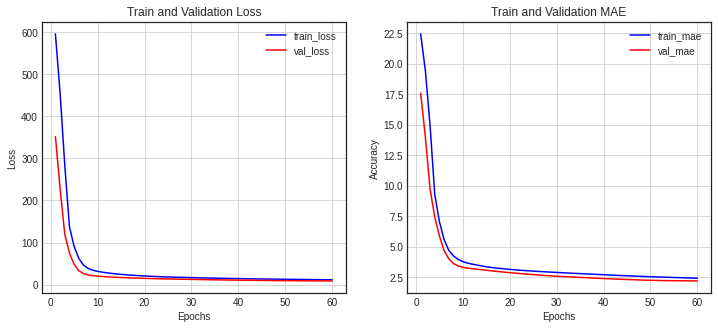

In [8]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
model.evaluate(x_test, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 21.1947 - mae: 3.0835


[21.194652557373047, 3.08347749710083]

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [11]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(x_val))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
2246
46


In [12]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels)

In [13]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(10000,), name='input'))  
model.add(layers.Dense(128))                          
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))           
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output')) 

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

In [15]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
281/281 [==============================] - 3s 6ms/step - loss: 1.7999 - accuracy: 0.5953 - val_loss: 1.1422 - val_accuracy: 0.7578
Epoch 2/60
281/281 [==============================] - 1s 5ms/step - loss: 1.2534 - accuracy: 0.7074 - val_loss: 0.8427 - val_accuracy: 0.8166
Epoch 3/60
281/281 [==============================] - 1s 5ms/step - loss: 1.0733 - accuracy: 0.7561 - val_loss: 0.7067 - val_accuracy: 0.8468
Epoch 4/60
281/281 [==============================] - 1s 5ms/step - loss: 0.9508 - accuracy: 0.7822 - val_loss: 0.6353 - val_accuracy: 0.8660
Epoch 5/60
281/281 [==============================] - 1s 5ms/step - loss: 0.8863 - accuracy: 0.8006 - val_loss: 0.5881 - val_accuracy: 0.8780
Epoch 6/60
281/281 [==============================] - 1s 5ms/step - loss: 0.8314 - accuracy: 0.8103 - val_loss: 0.5263 - val_accuracy: 0.8887
Epoch 7/60
281/281 [==============================] - 1s 5ms/step - loss: 0.7939 - accuracy: 0.8233 - val_loss: 0.4726 - val_accuracy: 0.8945
Epoch 

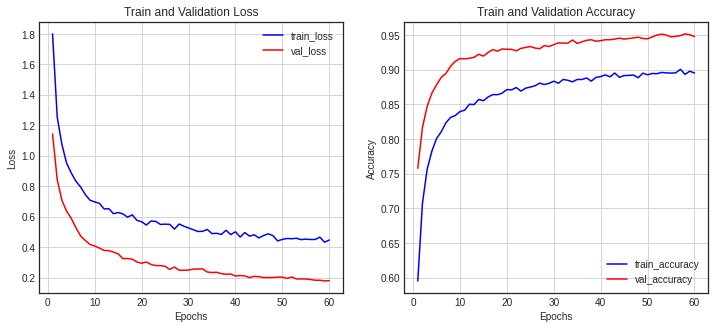

In [17]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [18]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 2.0908 - accuracy: 0.7596


[2.090754985809326, 0.7595725655555725]

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [20]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

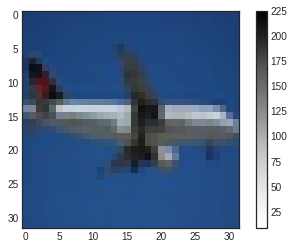

In [22]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [23]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [24]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [25]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.

from tensorflow.keras.utils import to_categorical
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)

(40000, 10)


In [37]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

from tensorflow.keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())  
model.add(layers.Activation('relu'))  
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())  
model.add(layers.Activation('relu'))  
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax'))  

model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)              

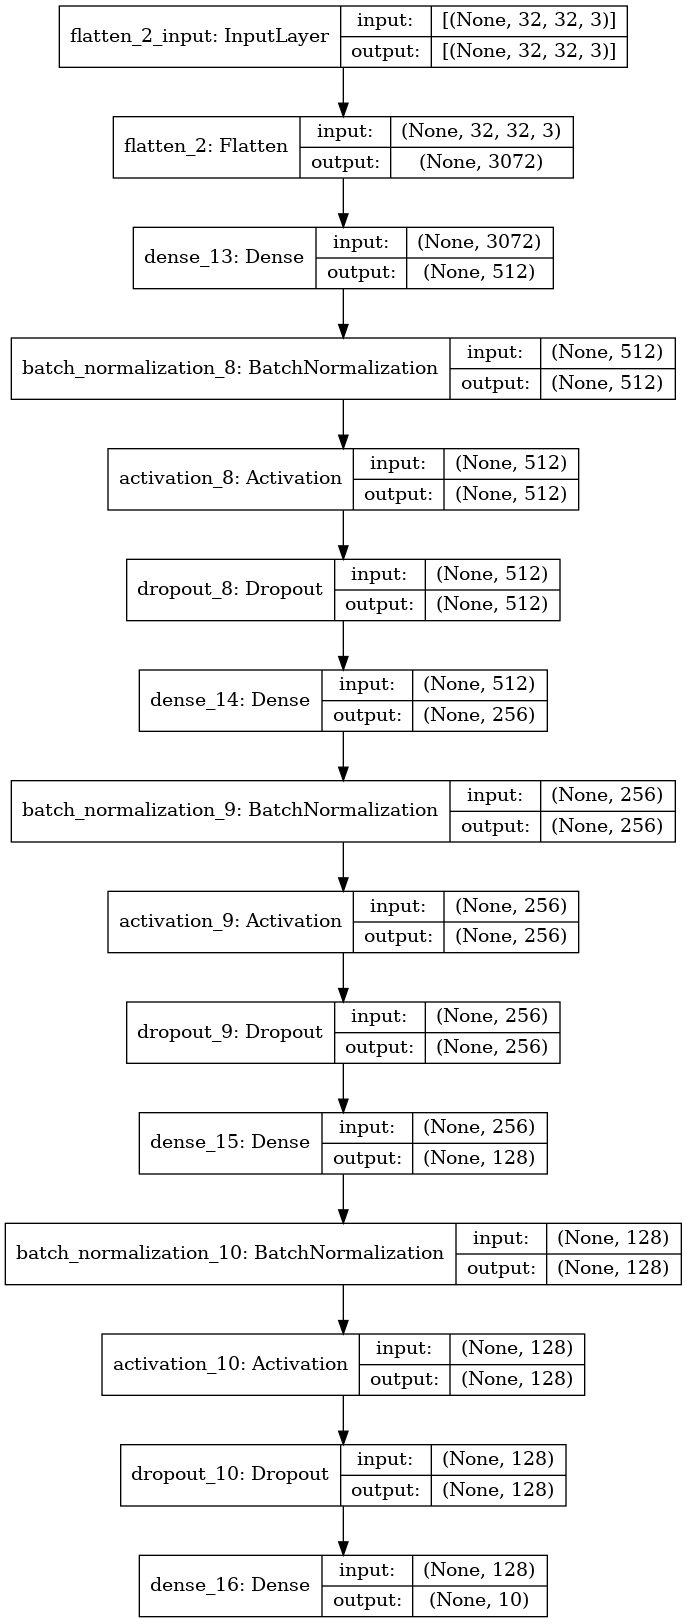

In [40]:
utils.plot_model(model, show_shapes=True)

In [41]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('CIFAR10 _model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2243 - accuracy: 0.2236 - val_loss: 1.8043 - val_accuracy: 0.3597
Epoch 2/60
1250/1250 [==============================] - 4s 4ms/step - loss: 1.9395 - accuracy: 0.2928 - val_loss: 1.7461 - val_accuracy: 0.3826
Epoch 3/60
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8545 - accuracy: 0.3239 - val_loss: 1.6956 - val_accuracy: 0.3998
Epoch 4/60
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8154 - accuracy: 0.3426 - val_loss: 1.6617 - val_accuracy: 0.4063
Epoch 5/60
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7777 - accuracy: 0.3584 - val_loss: 1.6411 - val_accuracy: 0.4127
Epoch 6/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7496 - accuracy: 0.3658 - val_loss: 1.6087 - val_accuracy: 0.4235
Epoch 7/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7253 - accuracy: 0.3806 - val_loss: 1.5870 - val_accuracy:

In [42]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()   



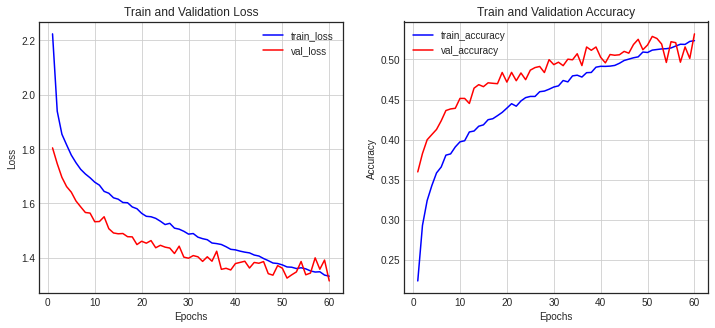

In [43]:
show_history(history)